# Lab: Gradient Descent and Stochastic Gradient Descent

Import first all these librairies   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for nicer plots
sns.set_theme()

In this lab, we aim to apply GD and SGD to some particular functions

## I. Application on a one-dimensional case

We fist start with applying GD to the one-dimensional function: 
$$
f_1: w \mapsto w^2 -w/2+1- \log[1+\exp(w/2+1)].
$$


Q1. First plot this function on $[-1,1]$.

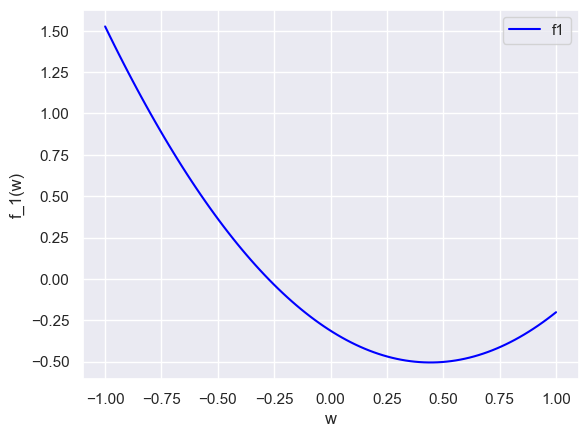

In [2]:
def f1(w):
    w = np.array(w) # to support element-wise operations
    return w**2-(w/2)+1-np.log(1+np.exp(w/2+1))

xv = np.linspace(-1, 1, 100)
yv = f1(xv)
plt.plot(xv, yv, color='blue', label = 'f1')
plt.xlabel('w')
plt.ylabel('f_1(w)')
plt.legend()
plt.show()

Q2. Compute the derivative of $f_1$ and implement this  function.

In [3]:
def df1(w):
        return 2*w - 1/2 - (1/2) * ((np.exp(w/2 + 1)) / (1 + np.exp(w/2 + 1)))

Q3. Is $f_1$ convex? 

<b> Let's compute the second-order condition:

\begin{equation}

\frac{1}{4} \cdot \frac{ \exp\left(\frac{w}{2} + 1\right)}{\left(1 + \exp\left(\frac{w}{2} + 1\right)\right)^2}

\end{equation}

Now, we analyze every term individually:
- 1/4 > 0
- Nominator: exponential function cannot be negative
- Denominator: square cannot be negative

Hence, the function is convex.

In [4]:
# As we have defined this function on [-1,1]

def ddf1(w):
    return 1 + np.exp(w/2 + 1) / (1 + np.exp(w/2 + 1))**2

w_values_convex= np.linspace(-1, 1, 100)
second_deriv_values = ddf1(w_values_convex)

if all(value >= 0 for value in second_deriv_values):
    print("The function f1 is convex on the interval [-1, 1].")
else:
    print("The function f1 is not convex on the interval [-1, 1].")

The function f1 is convex on the interval [-1, 1].


Q4. We aim to apply GD to $f_1$. Implement a function which takes as input 
- the derivative of the function to minimize
- an initial condition
- a stepsize/learning rate 
- a number of iterations

and ouputs

- the list of iterates of GD
- the list of the evaluations of the derivative of the function at the iterates

In [5]:
def grad_desc(df1, w0, l=0.1, num_iters=100):
    # Initializing
    w = float(w0)
    iterates = [w]
    gradients = [df1(w)]
    for _ in range(num_iters):
        grad_w = df1(w)  # Evaluate the derivative at the current iterate
        w -= l * grad_w # Update the iterate using the GD formula
        iterates.append(w)
        gradients.append(grad_w)
    return iterates, gradients

Q5. Apply GD to $f_1$ and plot the iterates and the functions at the iterates.

/var/folders/1q/4p_js9jn14x3_527d5fmd8dr0000gn/T/ipykernel_76546/2093321503.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w = float(w0)


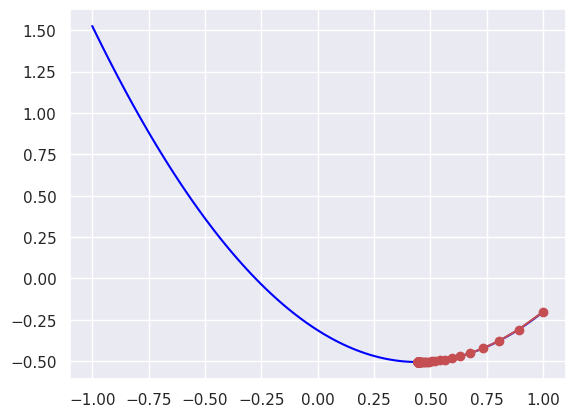

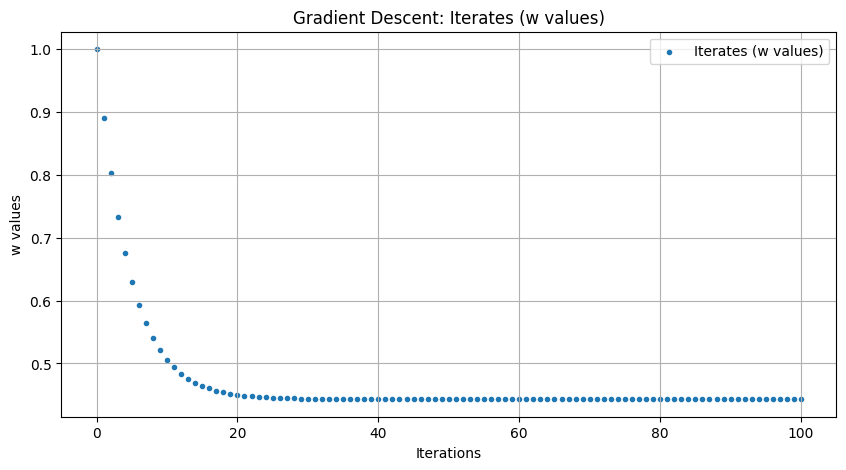

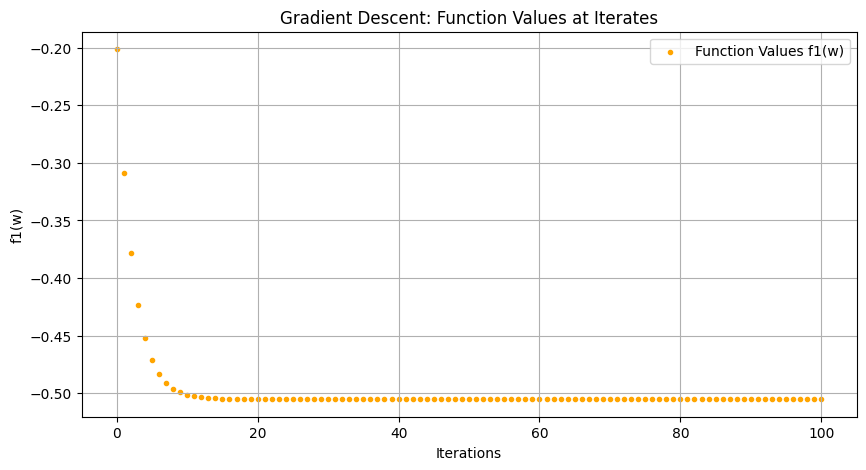

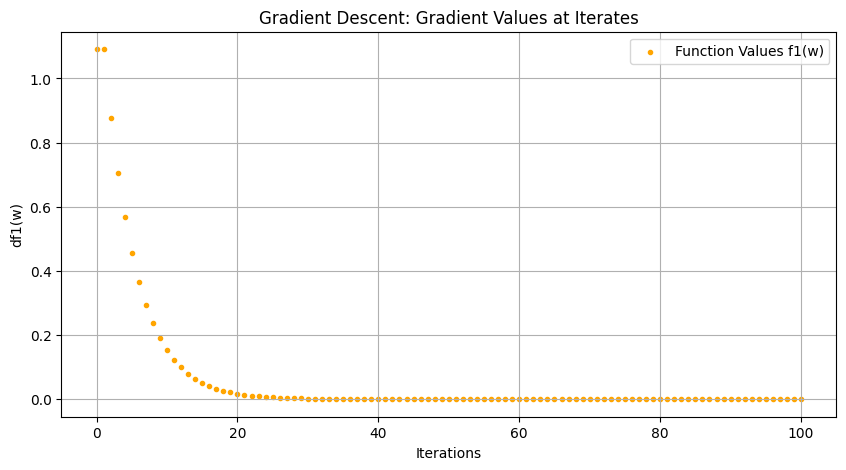

In [6]:
iterates, gradients = grad_desc(df1, 1.)

# GD iteractions on original function plot
w_values, _ = grad_desc(df1, np.array([1]), 0.1, 100)
f_values = f1(np.squeeze(w_values)) # we display the x values of each iterations on the f1 curve, and ignore the actual gradient values for this plot

plt.plot(xv, yv, color='blue', label = 'f1')
plt.plot(np.squeeze(w_values),f_values,'o-', color='r')

plt.style.use('default') # i reset the style to default as facecolor argument didn't work to have a white background which i prefer

# Iterate values as it converges
plt.figure(figsize=(10, 5))
plt.scatter(range(len(iterates)), iterates, label='Iterates (w values)', marker='.')
plt.title("Gradient Descent: Iterates (w values)")
plt.xlabel("Iterations")
plt.ylabel("w values")
plt.grid()
plt.legend()
plt.show()

# Values of the gradient as it converges
plt.figure(figsize=(10, 5))
plt.scatter(range(len(iterates)), f1(iterates), label='Function Values f1(w)', marker='.', color='orange')
plt.title("Gradient Descent: Function Values at Iterates")
plt.xlabel("Iterations")
plt.ylabel("f1(w)")
plt.grid()
plt.legend()
plt.show()

# Values of the actual function as it converges (converges to 0 as we are looking for a minimum)
plt.figure(figsize=(10, 5))
plt.scatter(range(len(gradients)), gradients, label='Function Values f1(w)', marker='.', color='orange')
plt.title("Gradient Descent: Gradient Values at Iterates")
plt.xlabel("Iterations")
plt.ylabel("df1(w)")
plt.grid()
plt.legend()
plt.show()



Q6. (Optional) Estimate the rate of convergence of GD for $f_1$. To this end, only 100 hundred iterations are sufficient starting from $1$.

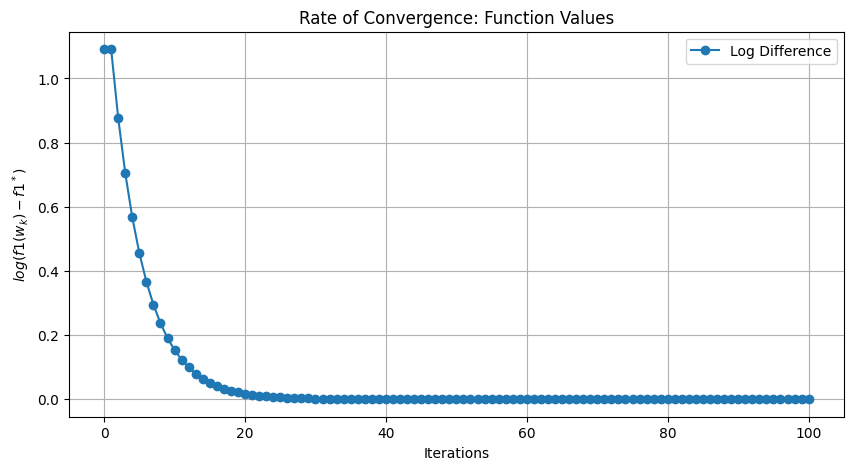

In [7]:
# Approximate the optimal value of f1(w) (smallest observed value)
f1_star = min(gradients)
log_differences = np.abs(np.array(gradients) - f1_star)

plt.figure(figsize=(10, 5))
plt.plot(range(len(gradients)), log_differences, label="Log Difference", marker="o")
plt.title("Rate of Convergence: Function Values")
plt.xlabel("Iterations")
plt.ylabel("$log (f1(w_k) - f1^*)$")
plt.grid()
plt.legend()
plt.show()

We now consider the one-dimensional function: 
$$
f_2 : w \mapsto w^2 + \cos(2\pi w) -\log(1+4 w^2) +w.
$$
Q7. First plot this function on $[-3,3]$.

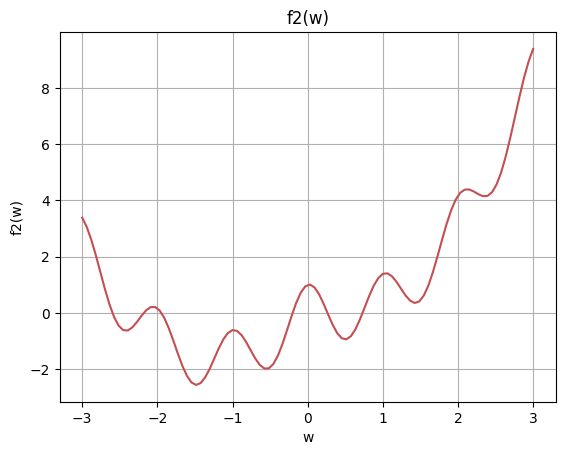

In [8]:
def f2(w):
    w = np.array(w)
    return w**2 + np.cos(2*np.pi*w) - np.log(1+4*(w**2)) + w

plt.plot(np.linspace(-3,3,100), f2(np.linspace(-3,3,100)), color='r')
plt.xlabel('w')
plt.ylabel('f2(w)')
plt.title('f2(w)')
plt.grid()
plt.show()

Q8. Is this function is convex?

<b> We can clearly see from a graphical analysis that it is not convex.

Q9. Apply GD using different initialization and plot the evaluation of $f_2$ at the resulting iterates.

Starting from -3.0
-2.9564864864864866 --> -2.4194454739954105
————————————————————————————————————————————————————————————————————————————————————————————————————
Starting from -2.0
-1.9794117647058824 --> -1.4809659268602726
————————————————————————————————————————————————————————————————————————————————————————————————————
Starting from -1.0
-1.006 --> -1.4809659268602724
————————————————————————————————————————————————————————————————————————————————————————————————————
Starting from 0.0
-0.01 --> -0.5487314083523644
————————————————————————————————————————————————————————————————————————————————————————————————————
Starting from 1.0
0.986 --> 0.5000000000000001
————————————————————————————————————————————————————————————————————————————————————————————————————
Starting from 2.0
1.9594117647058824 --> 1.4315977701939728
————————————————————————————————————————————————————————————————————————————————————————————————————
Starting from 3.0
2.9364864864864866 --> 2.357515824008932
————

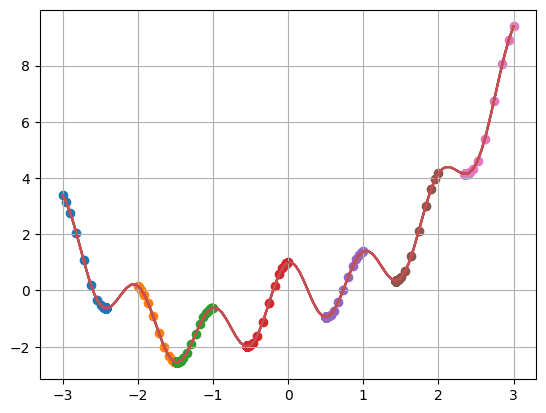

In [9]:
def df2(w):
    return 2*w -2*np.pi*np.sin(2*np.pi*w)-((8*w)/(1+4*(w**2)))+1

def grad_desc2(df2, w0, l, num_iters):
    # Initializing
    w = w0
    iterates = [w]
    gradients = [df2(w)]
    for _ in range(num_iters):
        grad_w = df2(w)  # Evaluate the derivative at the current iterate
        w -= l * grad_w # Update the iterate using the GD formula
        iterates.append(w)
        gradients.append(grad_w)
    return iterates, gradients

inits = np.arange(-3,4, 1, dtype=np.float64)
l = 0.01
num_iters = 1000

for w0 in inits:
    iterates, _ = grad_desc2(df2, w0, l, num_iters)
    print(f"Starting from {w0}")
    print(iterates[1], "-->", iterates [-1])
    print('—'*100)
    plt.plot(np.linspace(-3,3,100), f2(np.linspace(-3,3,100)), color='r')
    plt.scatter(iterates, f2(iterates), label=f'Initial w = {w0}')
    plt.grid()


## II. Application on the Rosenbrock function

In this part, we consider the function
$$
f_3 : w \mapsto (w_1-1)^2 + 100(w_1^2-w_2)^2 \, ,
$$
called the Rosenbrock function.

Q10. Plot the contour lines of this function.

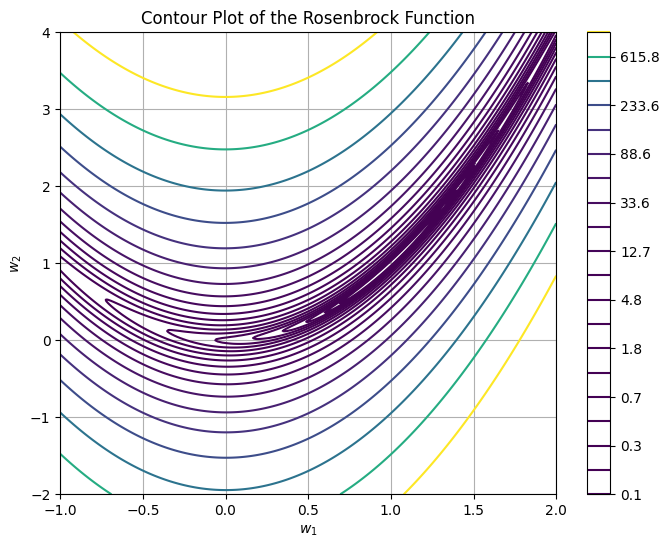

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function with one positional argument
def rosenbrock(w):
    w1, w2 = w
    return (w1 - 1)**2 + 100 * (w1**2 - w2)**2

# Generate a grid of values
w1 = np.linspace(-1, 2, 400)
w2 = np.linspace(-2, 4, 400)
W1, W2 = np.meshgrid(w1, w2)

# Combine W1 and W2 into a single argument for the rosenbrock function
Z = rosenbrock([W1, W2])

# Plot the contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(W1, W2, Z, levels=np.logspace(-1, 3, 20), cmap="viridis")
plt.colorbar(contour)
plt.title("Contour Plot of the Rosenbrock Function")
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.grid(True)
plt.show()

Q11. Is $f_3$ admits a unique minimizer? If so find it.

In [11]:
from scipy.optimize import minimize

initial_guess = [0.0, 0.0]
result = minimize(rosenbrock, initial_guess, method='BFGS')

print("Minimizer (w1, w2):", result.x)
print("Minimum value of the function:", result.fun)
# .x and .fun are predefined attributes in the object returned by the minimize function, so it's not necessary to define them.

Minimizer (w1, w2): [0.99999467 0.99998932]
Minimum value of the function: 2.8440052847381483e-11


Q12. Apply GD to $f_3$ for different choice of learning rates and starting from $w_0 = (-1,1)$. Comment your results.

In [12]:
# define f3's gradient
def rosenbrock_grad(w):
    w1, w2 = w
    grad_w1 = 2 * (w1 - 1) + 400 * w1 * (w1**2 - w2)
    grad_w2 = -200 * (w1**2 - w2)
    return np.array([grad_w1, grad_w2])

def gradient_descent(f, grad, w0, l, num_iters):
    w = np.array(w0, dtype=np.float64)
    steps = [w.copy] # to keep track of steps and be able to plot if necessary, also useful for debugging
    for i in range(num_iters):
        grad_w = grad(w)
        w -= l * grad_w
        steps.append(w.copy) # copy because otherwise it would modify existing values of w inside steps
    return w, steps

learning_rates = [0.0001, 0.00001, 0.000001]
w0 = [-1, 1]
num_iters = 1000

for l in learning_rates:
    w_final, trajectory = gradient_descent(rosenbrock, rosenbrock_grad, w0, l, num_iters)
    print(f"Learning Rate: {l}")
    print(f"Final Point: {w_final}")
    print(f"Function Value: {rosenbrock(w_final)}")
    print("-" * 50)

Learning Rate: 0.0001
Final Point: [-0.9126419   0.84097411]
Function Value: 3.6646935837261263
--------------------------------------------------
Learning Rate: 1e-05
Final Point: [-0.98873101  0.98559684]
Function Value: 3.9614635651765187
--------------------------------------------------
Learning Rate: 1e-06
Final Point: [-0.99717621  0.99941231]
Function Value: 3.9912650037475865
--------------------------------------------------


# III. Stochastic Gradient Descent for regression

Here we consider the regression problem:
$$
Y = w_0 + w_1 X + \epsilon \, , \, \epsilon \sim \mathrm{N}(0,1) \, .
$$
Therefore, we have to minimize a function $E$ of the form
$$
E(w) = \sum_{i=1}^N E_i(w) \, ,
$$
where $N$ is the number of datapoints and $E_i$ is a function of the $i$-th datapoint.

Q13. Generate some synthetic data. Plot the training data and the regression line.

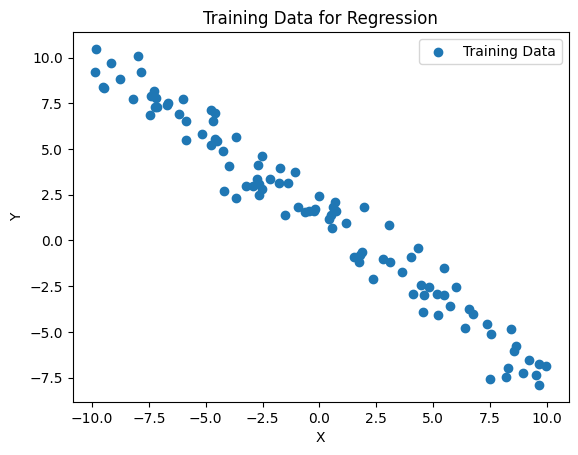

In [13]:
# Generate synthetic data
np.random.seed(2789)
N = 100  # nb of   points
X = np.random.uniform(-10, 10, N)  
w0 = np.random.randn()
w1 = np.random.randn()
epsilon = np.random.normal(0, 1, N)  
Y = w0 + w1 * X + epsilon

plt.scatter(X, Y, label='Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data for Regression')
plt.legend()
plt.show()

Q.14 Use GD to estimate the regression line.

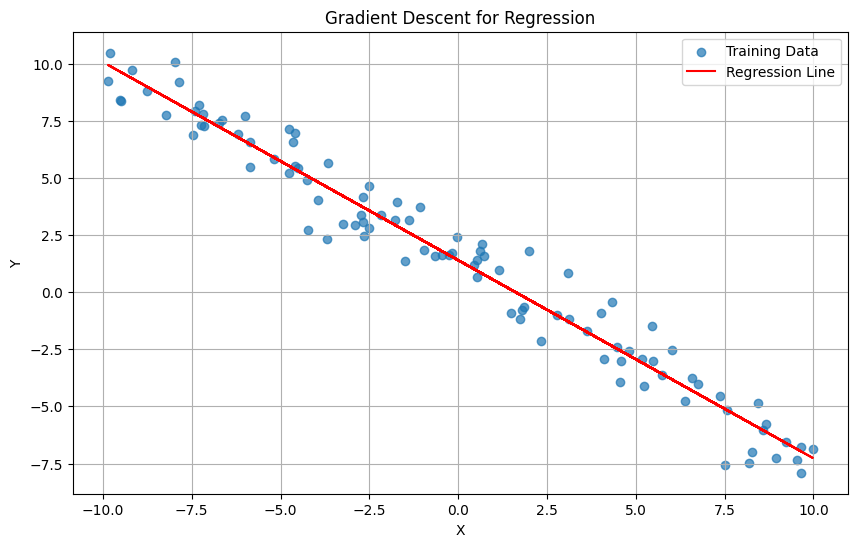

Estimated w0: 1.3956404132957194
Estimated w1: -0.8666061198122128


In [14]:
def calc_loss_and_gradient(X, Y, w):
    w0, w1 = w
    y_pred = w0 + w1 * X
    errors = Y - y_pred
    loss = (1 / (2 * len(X))) * np.sum(errors**2) # MSE Formuila
    grad_w0 = -(1 / len(X)) * np.sum(errors)  # Gradient wrt w0
    grad_w1 = -(1 / len(X)) * np.sum(errors * X)  # Gradient wrt w1
    return loss, np.array([grad_w0, grad_w1])

def gradient_descent(X, Y, l, num_iters):
    w = np.array([0.0, 0.0])
    losses = []
    for iters in range(num_iters):
        loss, gradient = calc_loss_and_gradient(X, Y, w)
        w -= l * gradient
        losses.append(loss)
    return w, losses

l = 0.01
num_iters = 1000
w, losses = gradient_descent(X, Y, l, num_iters)

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label="Training Data", alpha=0.7)
plt.plot(X, w[0] + w[1] * X, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gradient Descent for Regression")
plt.legend()
plt.grid()
plt.show()

print("Estimated w0:", w[0])
print("Estimated w1:", w[1])

Q15 Estimate the convergence rate of the gradient descent algorithm.

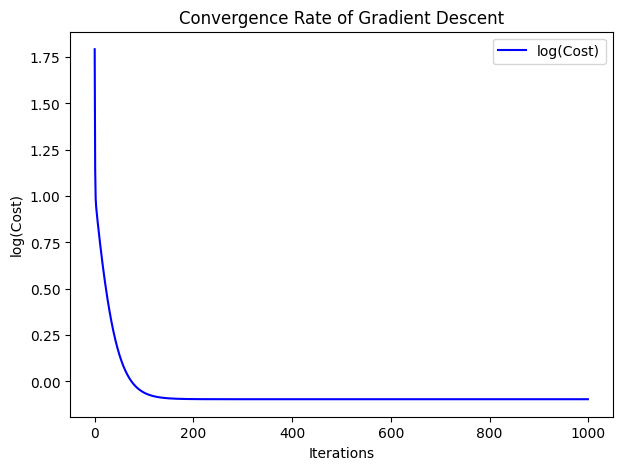

In [15]:
l = 0.01
num_iters = 1000
w0, w1 = 0, 0
costs = [] # to store (hopefully) decreasing mse values and show convergence rate
y_pred = w0 + w1 * X
error = Y - y_pred

for n in range(num_iters):
    grad_w0 = -2/N * np.sum(error)
    grad_w1 = -2/N * np.sum(error * X)
    w0 -= l * grad_w0
    w1 -= l * grad_w1
    y_pred = w0 + w1 * X
    error = Y - y_pred
    cost = np.mean(error**2)
    costs.append(cost)

plt.figure(figsize=(7, 5))
plt.plot(range(num_iters), np.log(costs), label="log(Cost)", color='blue')
plt.xlabel("Iterations")
plt.ylabel("log(Cost)")
plt.title("Convergence Rate of Gradient Descent")
plt.legend()
plt.show()



Q16 Apply random batch SGD for this regression problem:
$$
w_{n+1} = w_n - \eta \nabla E_{I_{n+1}}(w_n) \, ,
$$
where $(I_n)_n$ is a sequence of iid random variables uniform on $\{1,\ldots,N\}$.

1.4578084473066337


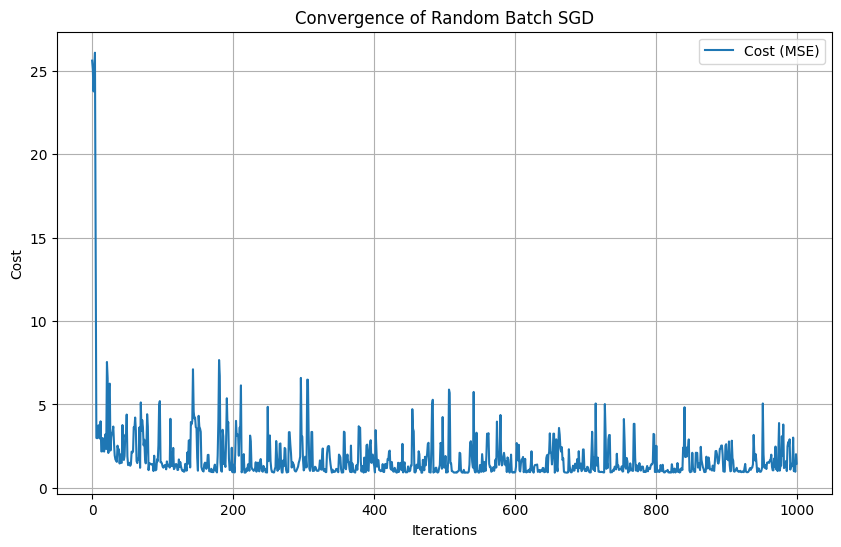

In [16]:
l = 0.01
num_iters = 1000
w0, w1 = 0, 0
costs = [] # to store (hopefully) decreasing mse values and show convergence rate

def sgd(X, Y, l, num_iters):
    w = np.array([0.0, 0.0])
    N = len(X)
    costs = []  # Store costs at each iteration

    for n in range(num_iters):
        i = np.random.randint(0, N)
        x_i, y_i = X[i], Y[i]
        error = y_i - (w[0] + w[1] * x_i)
        grad_w0 = -2*error  
        grad_w1 = -2*error * x_i 
        w[0] -= l * grad_w0
        w[1] -= l * grad_w1

        
        y_pred = w[0] + w[1] * X
        cost = np.mean((Y - y_pred)**2)
        costs.append(cost)
    
    return w, costs

lr = 0.01
num_iters = 1000
w_learned, costs = sgd(X, Y, l, num_iters)
print(costs[-1])

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(range(len(costs)), costs, label="Cost (MSE)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence of Random Batch SGD")
plt.legend()
plt.grid()
plt.show()


<b> While the trajectory of losses seems to approach a converge state, we see consequent fluctuations as opposed to a straight line (like the previous graph) meaning this batch SGD may have issues converging. More about this in the next question.

Q17. Show that the SGD iterates do not converge.

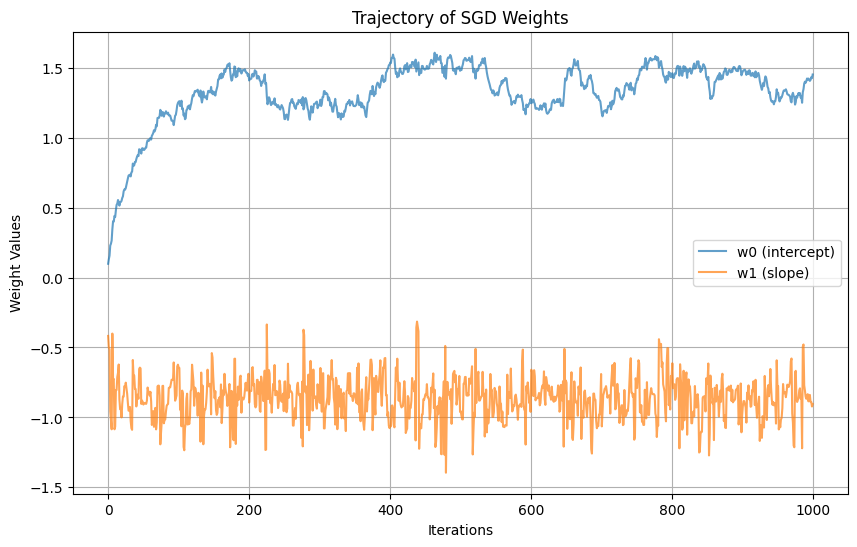

In [17]:
w0_trajectory = [] # Store the trajectory of weights
w1_trajectory = []

def sgd_with_tracking(X, Y, l, num_iters):
    w = np.array([0.0, 0.0])
    N = len(X)
    costs = [] 

    for n in range(num_iters):
        i = np.random.randint(0, N)
        x_i, y_i = X[i], Y[i]
        error = y_i - (w[0] + w[1] * x_i)  
        grad_w0 = -2 * error
        grad_w1 = -2 * error * x_i
        w[0] -= l * grad_w0
        w[1] -= l * grad_w1
        w0_trajectory.append(w[0])
        w1_trajectory.append(w[1])
        y_pred = w[0] + w[1] * X
        cost = np.mean((Y - y_pred) ** 2)  
        costs.append(cost)

    return w, costs

w_learned, costs = sgd_with_tracking(X, Y, l, num_iters)

plt.figure(figsize=(10, 6))
plt.plot(range(len(w0_trajectory)), w0_trajectory, label="w0 (intercept)", alpha=0.7)
plt.plot(range(len(w1_trajectory)), w1_trajectory, label="w1 (slope)", alpha=0.7)
plt.xlabel("Iterations")
plt.ylabel("Weight Values")
plt.title("Trajectory of SGD Weights")
plt.legend()
plt.grid()
plt.show()

<b> We can see here that the trajectories of $w_0$ and $w_1$ show oscillations instead of a smooth convergence. We see that the cost decreases initially but then oscialltes instead of stabilizing. This is because of the stochastic nature of SGD: each update is based on a single point only.

Q18. (Optional) Show that when the SGD iterates seem to be stabilize, they stay in a neighborhood with length which decreases linearly with the learning rate.